In [1]:
import matplotlib
%matplotlib notebook
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")
import matplotlib.animation as animation

import numpy as np
# tnrange - tqdm notebook range (jakoś tak), ładny progress bar
from tqdm import tnrange

from lab4 import LinearRegressionModel, ToyDataGenerator, fourier_base
from zadania import adam, bias_variance_estimation

In [2]:
n_train_samples = 30
sigma = .3
seed = 437
true_degree = 6

In [3]:
# TU ZOBACZMY KILKA RÓŻNYCH STOPNI SKOMPLIKOWANIA MODELU REGRESJI LINIOWEJ
# PRZY USTALONYM PRAWDZIWYM STOPNIU W GENERATORZE DANYCH

#degree = 2
degree = 6
#degree = 10
#degree = 20
#degree = 50

In [4]:
n_test_samples = 3000
optimizer = adam
linear_regression_seed = 43
linear_regression_n_steps = 100
optimizer_kwargs = {"learning_rate": .1, "beta1": .9, "beta2": .999, "epsilon": 1e-8}

tdg = ToyDataGenerator(seed=seed, sigma=sigma, degree=true_degree)

X_train, Y_train = tdg.sample(n_train_samples)
X_test, Y_test = tdg.sample(n_test_samples)
X_noiseless, Y_noiseless = tdg.noiseless_sample(n_test_samples)

model = LinearRegressionModel(
    fourier_base(X_train, degree),
    Y_train,
    optimizer,
    optimizer_kwargs,
    n_steps=linear_regression_n_steps,
    seed=linear_regression_seed)

Y_noiseless_pred = model.predict(fourier_base(X_noiseless, degree))
Y_test_pred = model.predict(fourier_base(X_test, degree))

100%|██████████| 100/100 [00:00<00:00, 197.05it/s]


<IPython.core.display.Javascript object>


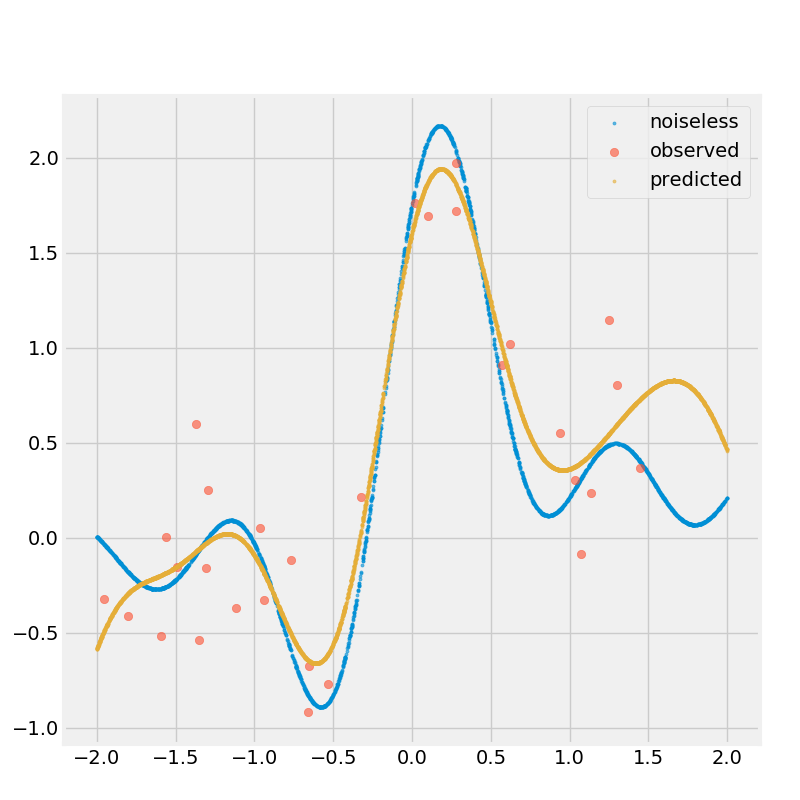

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_noiseless, Y_noiseless, alpha=.6, label="noiseless", s=5)
ax.scatter(X_train, Y_train, alpha=.6, label="observed")
ax.scatter(
    np.vstack((X_noiseless, X_test)),
    np.vstack((Y_noiseless_pred, Y_test_pred)),
    alpha=.6,
    label="predicted",
    s=5)
ax.legend()

In [6]:
mse = np.average(np.square(Y_test - Y_test_pred))
bias_squared = np.average(np.square(Y_noiseless - Y_noiseless_pred))

print("MSE:", mse)
print("bias^2:", bias_squared)

MSE: 0.165753698665
bias^2: 0.0785737433872


Wielokrotne symulacje - średnia __po wielu różnych zbiorach treningowych ustalonego rozmiaru__.

<IPython.core.display.Javascript object>


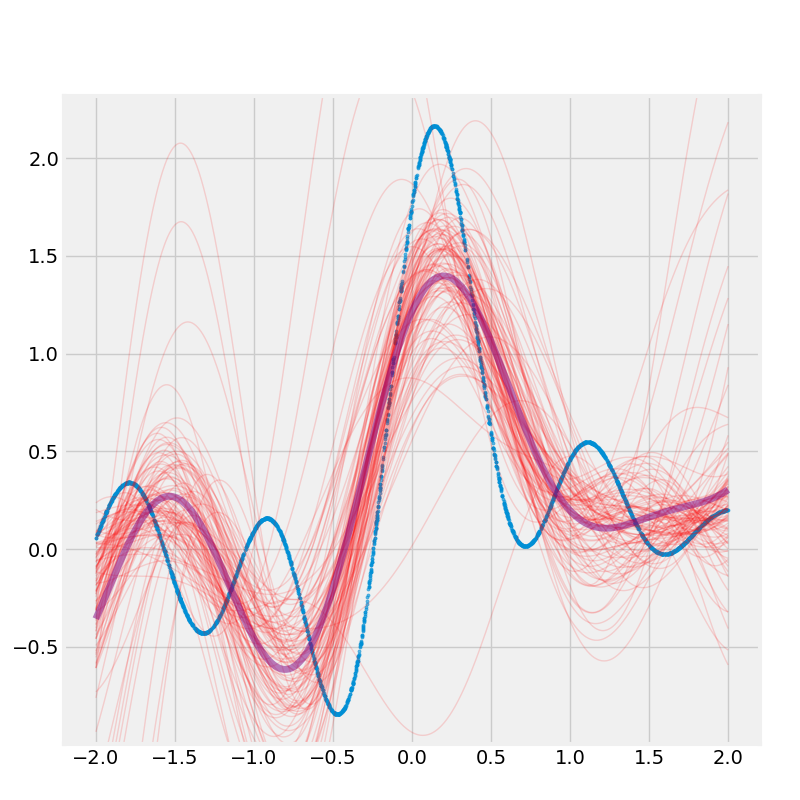

In [7]:
# TU SIĘ MOŻNA POBAWIĆ PARAMETRAMI
n_train_samples = 30
sigma = .05
seed = 437
true_degree = 7
degree = 4
n_test_samples = 3000
n_simulations = 100

optimizer = adam
linear_regression_seed = 43
linear_regression_n_steps = 100
optimizer_kwargs = {"learning_rate": .1, "beta1": .9, "beta2": .999, "epsilon": 1e-8}



tdg = ToyDataGenerator(seed=seed, sigma=sigma, degree=true_degree)

X_noiseless, Y_noiseless = tdg.noiseless_sample(n_test_samples)
X = np.sort(X_noiseless, axis=0)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_noiseless, Y_noiseless, alpha=.6, label="noiseless", s=5)

lines = [ax.plot([], [], lw=1, color="red", alpha=.15)[0] for _ in range(n_simulations)]
mean_line = ax.plot([], [], lw=5, color="purple", alpha=.5)[0]
preds = []

def animate(i):
    X_train, Y_train = tdg.sample(n_train_samples)
    model = LinearRegressionModel(
        fourier_base(X_train, degree),
        Y_train,
        optimizer,
        optimizer_kwargs,
        n_steps=linear_regression_n_steps,
        seed=linear_regression_seed,
        progress_bar=False)
    Y_noiseless_pred = model.predict(fourier_base(X, degree))
    preds.append(Y_noiseless_pred)
    lines[i].set_data(X, Y_noiseless_pred)
    mean_line.set_data(X, sum(preds)/len(preds))

anim = animation.FuncAnimation(fig, animate, range(n_simulations), interval=10, blit=True, repeat=False)